In [1]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

import numpy as np

In [2]:
class MyGaussianProcessRegressor:
    def __init__(
            self, 
            kernel=None, 
            alpha=1e-10, optimizer='fmin_l_bfgs_b', 
            n_restarts_optimizer=0, 
            normalize_y=False, 
            copy_X_train=True, 
            n_targets=None, 
            random_state=None):
        pass

    def fit(self,X,y):
        K = np.power(compute_vector_distance(X,X,ord=2),2)
        K[np.diag_indices_from(K)] += self.alpha
        K = np.exp(-K/(2*l**2))
        y_pred = np.sum(K @ y, axis = 1) / (X.T @ K @ X)
        return y_pred 

    def predict(self,X):
        pass

In [3]:
def compute_vector_distance(A,B,ord=1):
    """
    res[i,j] = ||A[i,:] - B[j,:]||_ord
    """
    assert len(A.shape) == 2, A.shape
    assert len(B.shape) == 2, B.shape
    assert A.shape[1] == B.shape[1], (A.shape, B.shape)
    m, d = A.shape
    n, d = B.shape

    aug_A = np.einsum("mdj,ndj->mnd", A[...,np.newaxis],np.ones((n,d,1)))
    aug_B = np.einsum("ndj,mdj->mnd", B[...,np.newaxis],np.ones((m,d,1)))
    res = np.power(np.sum(np.power(np.abs(aug_A - aug_B),ord),axis = -1),1/ord)
    return res

compute_vector_distance(np.array([[0,1],[1,2]]),np.array([[0,3]]),ord=2)

array([[2.        ],
       [1.41421356]])

In [4]:

X, y = make_friedman2(n_samples=500, noise=0, random_state=0)

kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0).fit(X, y)
print(gpr.score(X, y))
print(gpr.predict(X[:2,:], return_std=True))

0.36802938610174574
(array([653.08792288, 592.16905327]), array([316.68016218, 316.65121679]))


/home/julien-rsbrg/venv/venv_semantic_to_liking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/julien-rsbrg/venv/venv_semantic_to_liking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


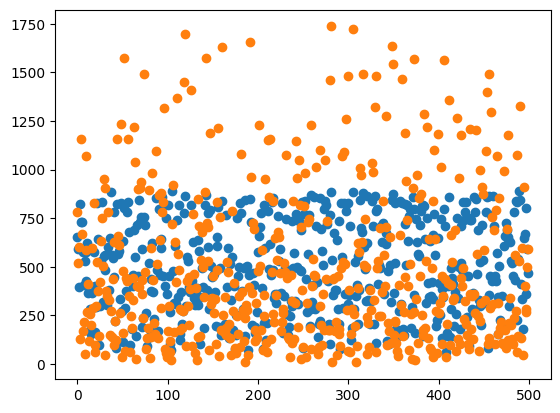

In [5]:
import numpy as np
import matplotlib.pyplot as plt


plt.scatter(np.arange(len(X)),gpr.predict(X))
plt.scatter(np.arange(len(y)),y)

In [6]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

X, y = load_iris(return_X_y=True)
kernel = 1.0 * RBF(1.0)

gpc = GaussianProcessClassifier(kernel=kernel,
        random_state=0).fit(X, y)
gpc.score(X, y)
gpc.predict_proba(X[:2,:])

array([[0.83548752, 0.03228706, 0.13222543],
       [0.79064206, 0.06525643, 0.14410151]])

# Geometric Kernels

In [7]:
import numpy as np
# Import the geometric_kernels backend.
import geometric_kernels
# Import a space and an appropriate kernel.
from geometric_kernels.spaces import Hypersphere
from geometric_kernels.kernels import MaternGeometricKernel

# Create a manifold (2-dim sphere).
hypersphere = Hypersphere(dim=2)

# Define 3 points on the sphere.
xs = np.array([[0., 0., 1.], [0., 1., 0.], [1., 0., 0.]])

# Initialize kernel.
kernel = MaternGeometricKernel(hypersphere)
params = kernel.init_params()
params["nu"] = np.array([5/2])
params["lengthscale"] = np.array([1.])

# Compute and print out the 3x3 kernel matrix.
print(np.around(kernel.K(params, xs), 2))

INFO (geometric_kernels): Numpy backend is enabled. To enable other backends, don't forget to `import geometric_kernels.*backend name*`.
INFO (geometric_kernels): We may be suppressing some logging of external libraries. To override the logging policy, call `logging.basicConfig`.


[[1.   0.36 0.36]
 [0.36 1.   0.36]
 [0.36 0.36 1.  ]]


IMPORTANT: The graph must be undirected and have nonnegative weights. The edges of this graph define the geometry: you expect that nodes connected by edges with large weights to be more correlated than nodes connected by edges with small weights.

## Basic

In [8]:
# Import a backend, we use numpy in this example.
import numpy as np

# Import the geometric_kernels backend.
import geometric_kernels

# Note: if you are using a backend other than numpy,
# you _must_ uncomment one of the following lines
# import geometric_kernels.tensorflow
# import geometric_kernels.torch
# import geometric_kernels.jax

# Import a space and an appropriate kernel.
from geometric_kernels.spaces import Graph
from geometric_kernels.kernels import MaternGeometricKernel

# We use networkx to visualize graphs
import networkx as nx

import matplotlib as mpl
import matplotlib.pyplot as plt    

### Defining a space

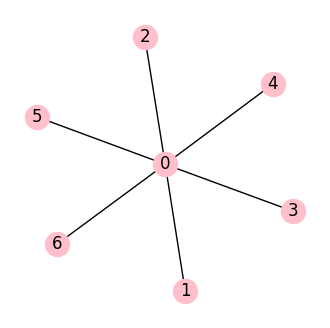

In [9]:
nx_graph = nx.star_graph(6)
pos = nx.spring_layout(nx_graph)

plt.figure(figsize=(4,4))
nx.draw(nx_graph, node_color = 'pink', ax=plt.gca(), pos=pos)
nx.draw_networkx_labels(nx_graph,pos=pos,labels={k:str(k) for k in np.arange(nx_graph.number_of_nodes())})
plt.show()

The normalize_laplacian parameter controls whether to use the eigenvectors of the unnormalized Laplacian or the symmetric normalized Laplacian as features (see the optional Theory section below for details). 

In [10]:
graph = Graph(np.array(nx.to_numpy_array(nx_graph)), normalize_laplacian=False)
graph

### Defining a Kernel

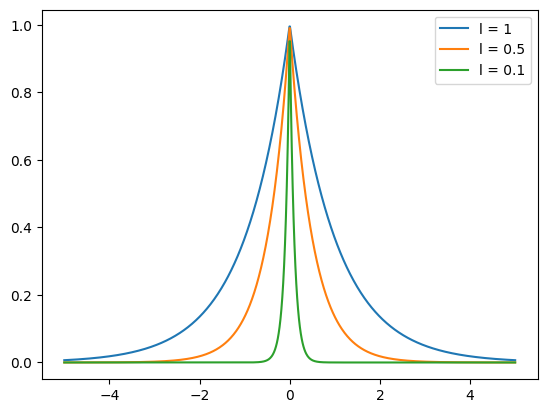

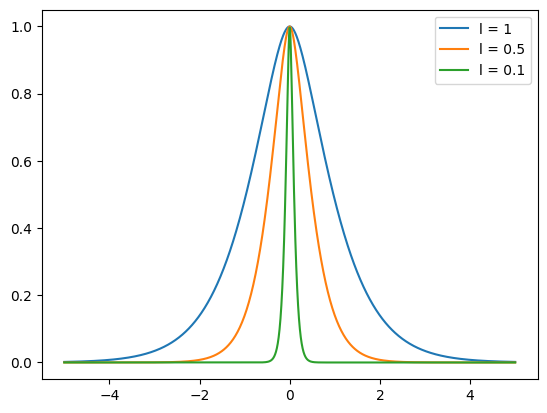

In [11]:
def matern_12(x0,x1, l=1):
    term = 1/l * np.linalg.norm(x0-x1,ord=2,axis=-1)
    return np.exp(-term)

def matern_32(x0,x1, l=1):
    term = np.sqrt(3)/l * np.linalg.norm(x0-x1,ord=2,axis=-1)
    return (1+term)*np.exp(-term)

for l in [1,0.5,0.1]:
    x0 = 0
    x1 = np.linspace(-5,5,1000)[...,np.newaxis]
    plt.plot(x1,matern_12(x0,x1,l),label=f"l = {l}")
plt.legend()
plt.show()

for l in [1,0.5,0.1]:
    x0 = 0
    x1 = np.linspace(-5,5,1000)[...,np.newaxis]
    plt.plot(x1,matern_32(x0,x1,l),label=f"l = {l}")
plt.legend()
plt.show()




In [12]:
kernel = MaternGeometricKernel(graph)

params = kernel.init_params()
print('params:', params)

params: {'nu': array([inf]), 'lengthscale': array([1.])}


In [13]:
kernel

In [14]:
params["lengthscale"] = np.array([3])
params_32  = params.copy()
params_inf = params.copy()
del params
params_32["nu"]  = np.array([3/2])
params_inf["nu"] = np.array([np.inf])

print("params_32",params_32)
print("params_inf",params_inf)

params_32 {'nu': array([1.5]), 'lengthscale': array([3])}
params_inf {'nu': array([inf]), 'lengthscale': array([3])}


### Evaluating Kernels on Random Inputs

In [15]:
key = np.random.RandomState(1234)
key, xs = graph.random(key, 3)
print(xs)

kernel_mat_32  = kernel.K(params_32,  xs, xs)
kernel_mat_inf = kernel.K(params_inf, xs, xs)
print("kernel_mat_inf\n",kernel_mat_inf)

[[3]
 [6]
 [5]]
kernel_mat_inf
 [[ 1.61284682 -0.12748651 -0.12748651]
 [-0.12748651  0.75234683  0.73301348]
 [-0.12748651  0.73301348  0.75234683]]


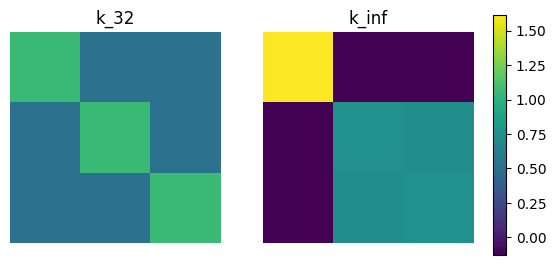

In [16]:
# find common range of values
minmin = np.min([np.min(kernel_mat_32), np.min(kernel_mat_inf)])
maxmax = np.max([np.max(kernel_mat_32), np.max(kernel_mat_inf)])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
cmap = plt.get_cmap('viridis')

ax1.imshow(kernel_mat_32, vmin=minmin, vmax=maxmax, cmap=cmap)
ax1.set_title('k_32')
ax1.set_axis_off()

ax2.imshow(kernel_mat_inf, vmin=minmin, vmax=maxmax, cmap=cmap)
ax2.set_title('k_inf')
ax2.set_axis_off()

# add space for color bar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.25, 0.02, 0.5])

# add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=minmin, vmax=maxmax))
fig.colorbar(sm, cax=cbar_ax)

plt.show()

### Visualizing kernels

In [17]:
base_point = 1 # choosing a fixed node for kernel visualization
other_points = np.arange(graph.num_vertices)[:, None]
print(other_points)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [18]:
values_32  = kernel.K(params_32,  np.array([[base_point]]),
                              other_points).flatten()
values_inf = kernel.K(params_inf, np.array([[base_point]]),
                              other_points).flatten()
print(values_32)
print(values_inf)

[0.60580813 1.05878229 0.52351292 0.52351292 0.52351292 0.52351292
 0.52351292]
[ 0.24861905  1.69889681 -0.04143651 -0.04143651 -0.04143651 -0.04143651
 -0.04143651]


In [19]:
# Get prior variances k(*, *) for * in nodes:
variance_32  = kernel.K_diag(params_32,  other_points)
variance_inf = kernel.K_diag(params_inf, other_points)
print(variance_32)
print(variance_inf)

[0.64730624 1.05878229 1.05878229 1.05878229 1.05878229 1.05878229
 1.05878229]
[0.24861905 1.69889681 0.32209684 1.61284682 1.61284682 0.75234683
 0.75234683]


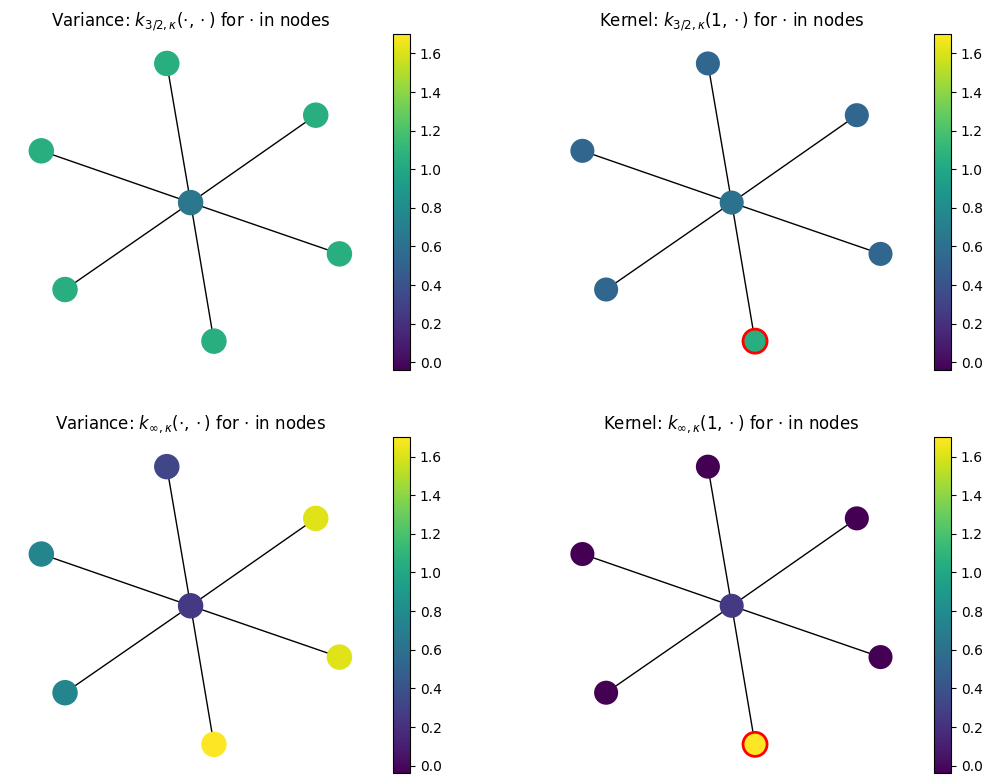

In [20]:
cmap = plt.get_cmap('viridis')

# Set the colorbar limits:
vmin = min(0.0, values_32.min(), values_inf.min())
vmax = max(1.0, variance_32.max(), variance_inf.max())


# Red outline for the base_point:
edgecolors = [(0, 0, 0, 0)]*graph.num_vertices
edgecolors[base_point] = (1, 0, 0, 1)

# Save graph layout so that graph appears the same in every plot
kwargs = {'pos': pos}


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12.8, 9.6))

# Plot variance 32
nx.draw(nx_graph, ax=ax1, cmap=cmap, node_color=variance_32,
        vmin=vmin, vmax=vmax, **kwargs)
sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(sm, ax=ax1)
ax1.set_title('Variance: $k_{3/2, \kappa}(\cdot, \cdot)$ for $\cdot$ in nodes')

# Plot kernel values 32
nx.draw(nx_graph, ax=ax2, cmap=cmap, node_color=values_32,
        vmin=vmin, vmax=vmax, edgecolors=edgecolors,
        linewidths=2.0, **kwargs)
sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(sm, ax=ax2)
ax2.set_title('Kernel: $k_{3/2, \kappa}($%d$, \cdot)$ for $\cdot$ in nodes' % base_point)

# Plot variance inf
nx.draw(nx_graph, ax=ax3, cmap=cmap, node_color=variance_inf,
        vmin=vmin, vmax=vmax, **kwargs)
sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(sm, ax=ax3)
ax3.set_title('Variance: $k_{\infty, \kappa}(\cdot, \cdot)$ for $\cdot$ in nodes')

# Plot kernel values inf
nx.draw(nx_graph, ax=ax4, cmap=cmap, node_color=values_inf,
        vmin=vmin, vmax=vmax, edgecolors=edgecolors,
        linewidths=2.0, **kwargs)
sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(sm, ax=ax4)
ax4.set_title('Kernel: $k_{\infty, \kappa}($%d$, \cdot)$ for $\cdot$ in nodes' % base_point)


plt.show()

Note that the variance changes from node to node on this graph.

For example, for the unnormalized Laplacian, the variance is related to the expected return time of a random walk: how many steps, on average, does it take a particle randomly walking over the graph and starting in node x to return back to node x. For the center node, the expected return time is 2. For other nodes, it is always higher. Hence the variance in the center is lower than in the other nodes. This argument is inspired by Borovitskiy et al. (2021).

In [21]:
print('Variance in the center node is %0.2f,' % variance_32[0],
      'variance in the side nodes is %0.2f.' % variance_32[1],
      'The average variance is %0.2f.' % np.mean(variance_32))

Variance in the center node is 0.65, variance in the side nodes is 1.06. The average variance is 1.00.


## Feature Maps and Sampling    

### Defining a Feature Map

In [22]:
from geometric_kernels.kernels import default_feature_map

feature_map = default_feature_map(kernel=kernel)

In [23]:
# xs are random points from above
_, embedding = feature_map(xs, params_32)

print('xs (shape = %s):\n%s' % (xs.shape, xs))
print('')
print('embedding (shape = %s):\n%s' % (embedding.shape, embedding))

kernel_mat_32  = kernel.K(params_32,  xs, xs)
kernel_mat_32_alt = np.matmul(embedding, embedding.T)

print('')
print('||k(xs, xs) - phi(xs) * phi(xs)^T|| =', np.linalg.norm(kernel_mat_32 - kernel_mat_32_alt))

xs (shape = (3, 1)):
[[3]
 [6]
 [5]]

embedding (shape = (3, 7)):
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

||k(xs, xs) - phi(xs) * phi(xs)^T|| = 2.2377342288765063


### Efficient Sampling using Feature Maps

In [24]:
from geometric_kernels.sampling import sampler

sample_paths = sampler(feature_map, s=2)

# introduce random state for reproducibility (optional)
# `key` is jax's terminology
key = np.random.RandomState(seed=1234)

# new random state is returned along with the samples
key, samples = sample_paths(xs, params_32, key=key)

print('Two samples evaluated at the xs are:')
print(samples)

Two samples evaluated at the xs are:
[[0 2]
 [0 2]
 [0 2]]


/home/julien-rsbrg/venv/venv_semantic_to_liking/lib/python3.10/site-packages/lab/numpy/random.py:30: UserWarning: Casting random number of type float to type integer.
  warnings.warn("Casting random number of type float to type integer.")


### Visualizing Samples

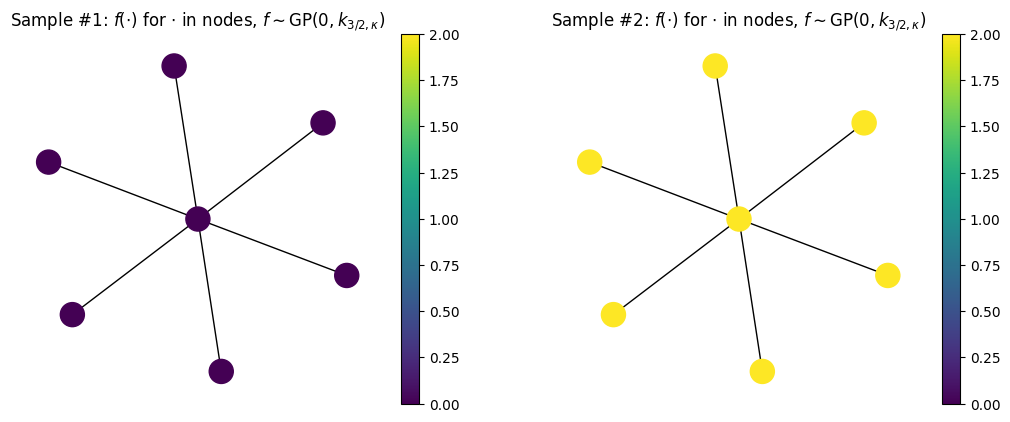

In [25]:
key = np.random.RandomState(seed=1234)
key, samples = sample_paths(other_points, params_32, key=key)

sample1 = samples[:, 0]
sample2 = samples[:, 1]

cmap = plt.get_cmap('viridis')

# Set the colorbar limits:
vmin = min(sample1.min(), sample2.min())
vmax = max(sample1.max(), sample2.max())

# Save graph layout so that graph appears the same in every plot
kwargs = {'pos': pos}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.8, 4.8))

# Plot sample #1
nx.draw(nx_graph, ax=ax1, cmap=cmap, node_color=sample1,
        vmin=vmin, vmax=vmax, **kwargs)
sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(sm, ax=ax1)
ax1.set_title('Sample #1: $f(\cdot)$ for $\cdot$ in nodes, $f \sim \mathrm{GP}(0, k_{3/2, \kappa})$')


# Plot sample #2
nx.draw(nx_graph, ax=ax2, cmap=cmap, node_color=sample2,
        vmin=vmin, vmax=vmax, **kwargs)
sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(sm, ax=ax2)
ax2.set_title('Sample #2: $f(\cdot)$ for $\cdot$ in nodes, $f \sim \mathrm{GP}(0, k_{3/2, \kappa})$')

plt.show()

## Prediction

In [26]:
# problem definition

x_base = np.array([[1]])
y_base = np.array([[1]])

x_pred = np.arange(0,graph.num_vertices)[...,None]

# pred 

kernel_mat_32 = kernel.K(params_32, x_pred, x_base)
kernel_mat_32_base = kernel.K(params_32, x_base, x_base)

values_32 = (kernel_mat_32 / (np.diag(kernel_mat_32_base) + 1e-10)) @ y_base # shouldn't take everything, only contact (* adj_matrix)
print("values_32:",values_32)

kernel_mat_inf = kernel.K(params_inf, x_pred, x_base)
kernel_mat_inf_base = kernel.K(params_inf, x_base, x_base)

values_inf = (kernel_mat_inf / (np.diag(kernel_mat_inf_base) + 1e-10)) @ y_base
print("values_inf:",values_inf)


values_32: [[0.5721744 ]
 [1.        ]
 [0.49444812]
 [0.49444812]
 [0.49444812]
 [0.49444812]
 [0.49444812]]
values_inf: [[ 0.14634146]
 [ 1.        ]
 [-0.02439024]
 [-0.02439024]
 [-0.02439024]
 [-0.02439024]
 [-0.02439024]]


vmin,vmax -0.02439024390100272 0.9999999999411383


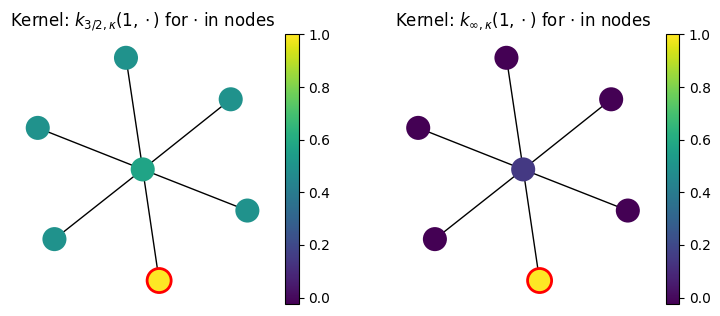

In [27]:
cmap = plt.get_cmap('viridis')

# Set the colorbar limits:
vmin = min(values_32.min(), values_inf.min())
vmax = max(values_32.max(), values_inf.max())
print("vmin,vmax",vmin,vmax)


# Red outline for the base_point:
edgecolors = [(0, 0, 0, 0)]*graph.num_vertices
edgecolors[base_point] = (1, 0, 0, 1)

# Save graph layout so that graph appears the same in every plot
kwargs = {'pos': pos}


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3.5))

# Plot kernel values 32
nx.draw(nx_graph, ax=ax1, cmap=cmap, node_color=values_32,
        vmin=vmin, vmax=vmax, edgecolors=edgecolors,
        linewidths=2.0, **kwargs)
sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(sm, ax=ax1)
ax1.set_title('Kernel: $k_{3/2, \kappa}($%d$, \cdot)$ for $\cdot$ in nodes' % base_point)

# Plot kernel values inf
nx.draw(nx_graph, ax=ax2, cmap=cmap, node_color=values_inf,
        vmin=vmin, vmax=vmax, edgecolors=edgecolors,
        linewidths=2.0, **kwargs)
sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(sm, ax=ax2)
ax2.set_title('Kernel: $k_{\infty, \kappa}($%d$, \cdot)$ for $\cdot$ in nodes' % base_point)


plt.show()